## Text Column Distributions

C:\Users\simen\AppData\Local\Temp\ipykernel_22252\212787085.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_df['len'] = df[column_name].apply(len_func)


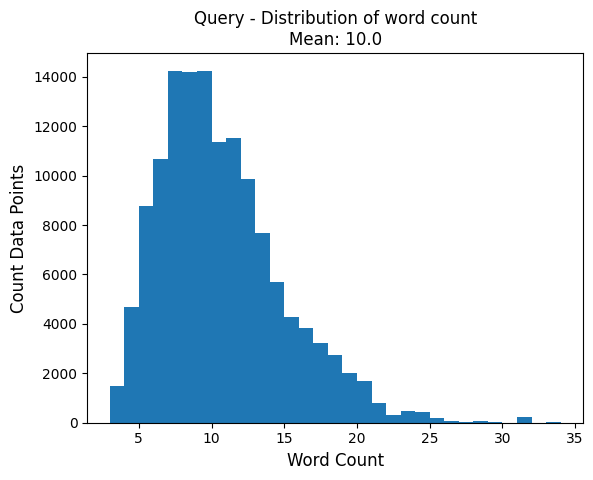

C:\Users\simen\AppData\Local\Temp\ipykernel_22252\212787085.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_df['len'] = df[column_name].apply(len_func)


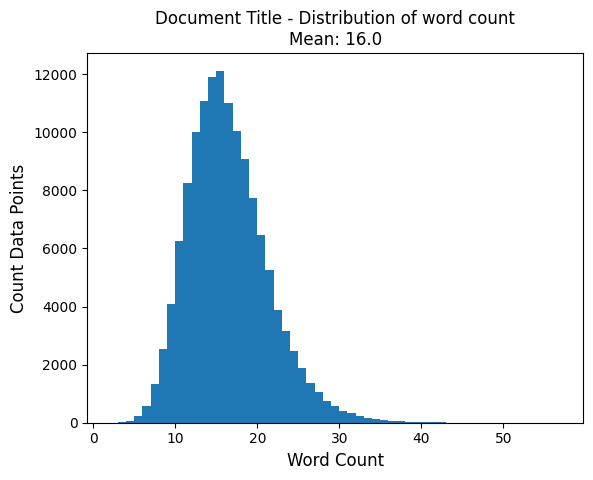

C:\Users\simen\AppData\Local\Temp\ipykernel_22252\212787085.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_df['len'] = df[column_name].apply(len_func)


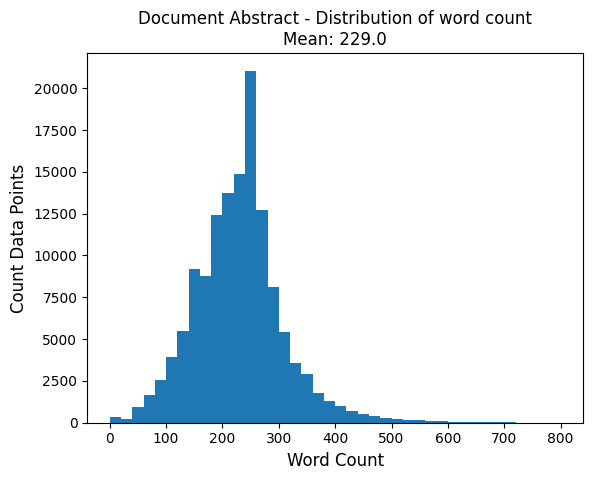

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import load_pickle

def len_func(x):
    splitted = x.split()
    return len(splitted)

def print_dist(df, column_name, binwidth, column_name_2):
    tot_rows = df.count()
    title_df = df[[column_name]]
    title_df['len'] = df[column_name].apply(len_func)
    title_lengths = title_df['len'].tolist()
    if max(title_lengths) > 1400: max_width = 800
    else: max_width = max(title_lengths)
    mean = np.mean(title_lengths)
    n, bins, patches = plt.hist(title_lengths, bins=np.arange(min(title_lengths), max_width + binwidth, binwidth))
    plt.title(f"{column_name_2} - Distribution of word count\nMean: {round(mean,0)}")
    plt.xlabel('Word Count', fontsize=12)
    plt.ylabel('Count Data Points', fontsize=12)
    plt.show()

reviews_pandas_filename = "./data/processed/df_approach6.pickle"
df = load_pickle(reviews_pandas_filename)
#df = df[:1000]

print_dist(df, 'title', 1, 'Query')
print_dist(df, 'study_title', 1, 'Document Title')
print_dist(df, 'study_abstract', 20, 'Document Abstract')

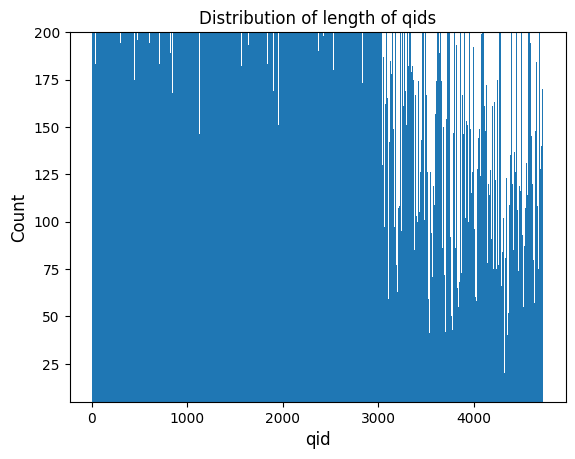

In [21]:
from matplotlib.ticker import MaxNLocator

qids = df['qid'].tolist()
n, bins, patches = plt.hist(qids, bins=np.arange(min(qids), max(qids) + 10, 10), align="right")
plt.title(f"Distribution of length of qids")
plt.xlabel('qid', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.ylim(5, 200)
plt.show()

In [22]:
def count_words(sentence):
    return len(sentence.split())

df["title_count"] = df["title"].apply(count_words)
df["study_title_count"] = df["study_title"].apply(count_words)
df["abstract_count"] = df["study_abstract"].apply(count_words)

In [23]:
print(len(df))
print(len(df[df["title_count"] > 32]))
print(len(df[df["abstract_count"] > (512)]))

134840
10
846


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\simen\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


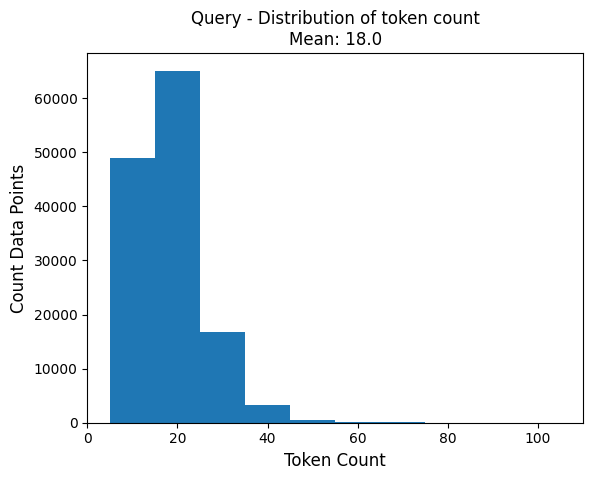

c:\Users\simen\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


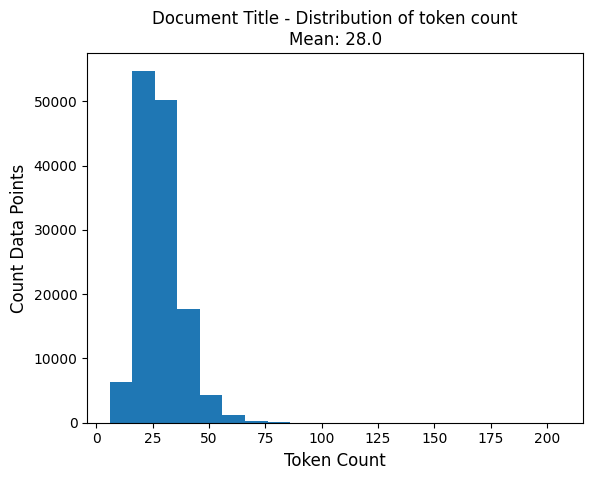

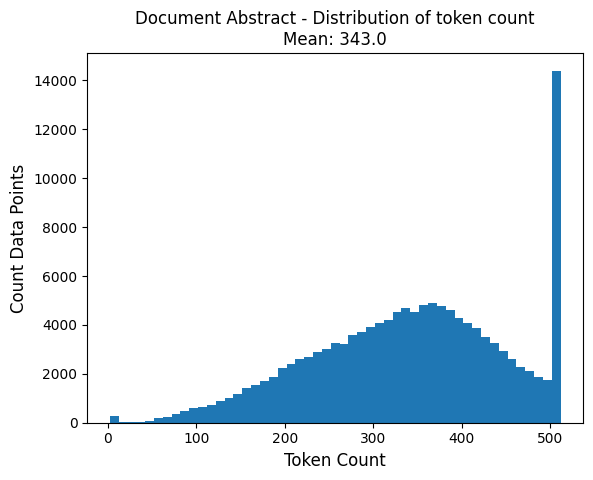

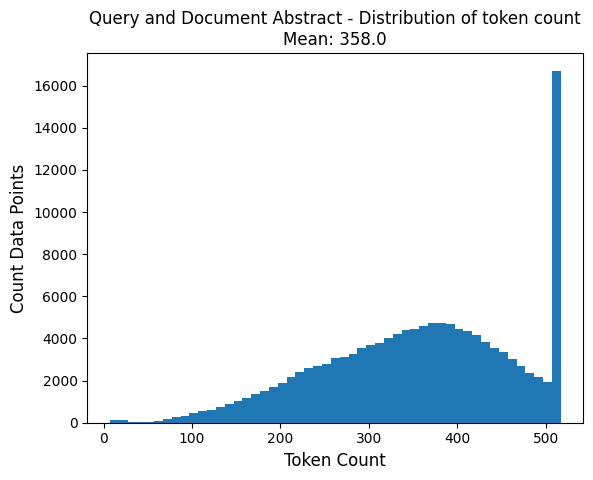

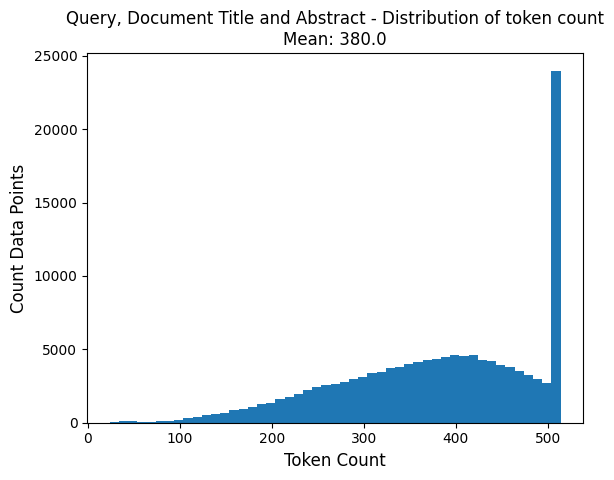

In [24]:
from utils import preprocess_df_bert_2_4
from utils import get_tokenizer

tokenizer = get_tokenizer(None, "bert-base-uncased")

def get_token_len(ids):
    counter = 0
    for item in ids:
        if item != 0:
            counter += 1
        else:
            return counter
    return counter

def count_tokenize(text):
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=512,
        return_token_type_ids=True,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
    )
    encoding_output = encoding['input_ids']
    encoding_length = get_token_len(encoding_output[0])
    return encoding_length

def print_tokenize(text_columns, title):
    df_processed = preprocess_df_bert_2_4(df, text_columns, False, None, 'text')
    df_processed['tokenizing_len'] = df_processed['text'].apply(count_tokenize)
    binwidth = 10
    token_lengths = df_processed['tokenizing_len'].tolist()
    if max(token_lengths) < 100: max_width = 100
    elif max(token_lengths) < 200: max_width = 200
    elif max(token_lengths) > 1400: max_width = 800
    else: max_width = max(token_lengths)
    mean = np.mean(token_lengths)
    n, bins, patches = plt.hist(token_lengths, bins=np.arange(min(token_lengths), max_width + binwidth, binwidth))
    plt.title(f"{title} - Distribution of token count\nMean: {round(mean,0)}")
    plt.xlabel('Token Count', fontsize=12)
    plt.ylabel('Count Data Points', fontsize=12)
    plt.show()
    return token_lengths

token_lengths1 = print_tokenize("title", "Query")
token_lengths2 = print_tokenize("study_title", "Document Title")
token_lengths3 = print_tokenize("study_abstract", "Document Abstract")

token_lengths4 = print_tokenize("title study_abstract", "Query and Document Abstract")
token_lengths5 = print_tokenize("title study_title study_abstract", "Query, Document Title and Abstract")


In [27]:
def get_percantage_above_512(tokens):
    return round(sum(i >= 512 for i in tokens) / len(tokens) * 100, 0)
print(get_percantage_above_512(token_lengths1))
print(get_percantage_above_512(token_lengths2))
print(get_percantage_above_512(token_lengths3))
print(get_percantage_above_512(token_lengths4))
print(get_percantage_above_512(token_lengths5))

0.0
0.0
10.0
12.0
16.0


In [26]:
below_512 = [item for item in token_lengths if item < 512]
above_512 = [item for item in token_lengths if item >= 512]
below_400 = [item for item in token_lengths if item < 400]
print(len(df))
print(len(below_512))
print(len(above_512))
print(len(below_400))



NameError: name 'token_lengths' is not defined

(array([38711.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 20083.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

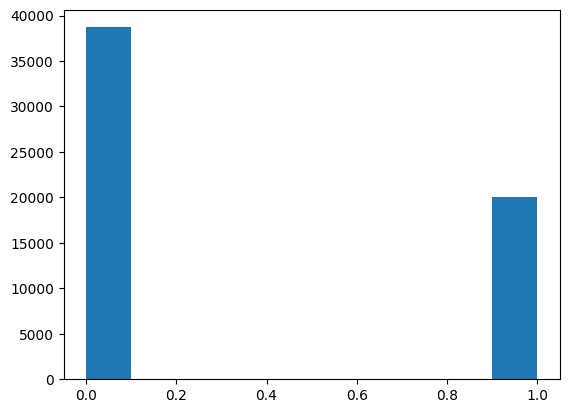

In [ ]:
labels = df['label'].tolist()
plt.hist(labels)

In [ ]:
df_sub = df_processed.loc[df_processed['tokenizing_len'] < 512]
print(len(df_sub))
df_sub = df_sub.drop(columns=['text', 'tokenizing_len'])

51340


In [ ]:
from utils import save_pickle
df = df_sub
save_pickle("./data/analysis_testing/df.pickle", df) 

In [ ]:
df.columns

Index(['study_author', 'study_title', 'SO', 'study_year', 'id',
       'characteristics_method', 'characteristics_participants',
       'characteristics_interventions', 'characteristics_outcomes',
       'characteristics_notes', 'study_abstract', 'document_date', 'pubmed_id',
       'journal', 'label', 'date', 'title', 'study_date', 'qid', 'docid',
       'title_count', 'study_title_count', 'abstract_count'],
      dtype='object')

In [ ]:
from IPython.display import display, HTML
from tabulate import tabulate
import pandas as pd

df_test = load_pickle("./data/processed/df_part_1.pickle")
df_test2 = load_pickle("./data/processed/df_approach6.pickle")
print(len(df_test))
print(len(df_test2))

58794
134840
